### **利用geopandas进行矢量数据快速读、写、及可视化.**
geopandas是用来处理地理空间数据的python第三方库，它是在pandas的基础上建立的，融合了pandas的数据类型，并且提供了操作地理空间数据的高级接口，使得在python中进行GIS操作变成可能。


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_kunming = 'data/Section-2/kunming_districts.shp'
path_kunming_out_2 = 'data/Section-4/vector_out_2.shp'


### 1. 读入矢量数据

In [3]:
kunming_gpd = gpd.read_file(path_kunming)
kunming_gpd.head(7)


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,530103,panglong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
2,530111,guandu,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
3,530112,xishan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.80340 26.30291, 102.80537 26.303..."
5,530114,chenggong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.85321 24.69792, 102.85168 24.698..."
6,530115,jinning,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.73979 24.81731, 102.74137 24.815..."


### 2. 可视化矢量数据

In [4]:
# ids_chenggong = kunming_gpd
ids_chenggong = np.where(kunming_gpd['dt_name'] == 'chenggong')[0]
kunming_gpd.iloc[ids_chenggong,:]



,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
5,530114,chenggong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.85321 24.69792, 102.85168 24.698..."


/Users/luo/miniconda3/envs/venv/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

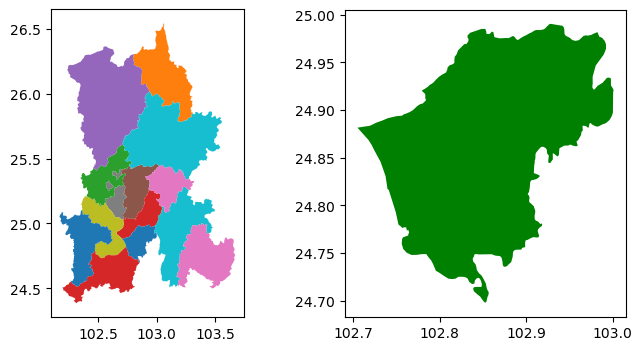

In [9]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
### 昆明区域
kunming_gpd.plot(ax=ax[0], column='dt_name')
### 呈贡区域
id_chenggong = np.where(kunming_gpd['dt_name'] == 'chenggong')[0]
kunming_chenggong_gpd = kunming_gpd.iloc[id_chenggong]
kunming_chenggong_gpd.plot(ax=ax[1], color='green')


#### **3. 写出矢量文件**

#### 3.1 写出只含有特定字段(name)的矢量文件

In [10]:
path_kunming_out_1 = 'data/Section-4/vector_out_1.shp'
kunming_out_1 = kunming_gpd[['dt_name', 'geometry']]
kunming_out_1.head()



,dt_name,geometry
0,wuhua,"MULTIPOLYGON (((102.71331 25.13651, 102.71547 ..."
1,panglong,"POLYGON ((102.71668 25.04473, 102.71663 25.045..."
2,guandu,"POLYGON ((102.71717 25.03341, 102.71792 25.033..."
3,xishan,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,dongchuan,"POLYGON ((102.80340 26.30291, 102.80537 26.303..."


In [11]:
# import pandas as pd
kunming_out_1 = gpd.GeoDataFrame(kunming_out_1)
kunming_out_1.to_file(path_kunming_out_1)


#### 3.1 写出只含有特定特征（呈贡区）矢量文件


In [13]:
# id_sel = np.where(kunming_gpd['dt_name']=='呈贡区')[0]
kunming_out_2 = kunming_gpd.iloc[id_chenggong]
kunming_out_2

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
5,530114,chenggong,530100,昆明市,530000,云南省,100000,中华人民共和国,"POLYGON ((102.85321 24.69792, 102.85168 24.698..."


In [14]:
kunming_out_2.to_file(path_kunming_out_2)
